In [107]:
# Add matplotlib inline magic command
%matplotlib inline

#Import dependencies and Set Up
import matplotlib.pyplot as plt
import pandas as pd

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

In [2]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Inspect city data df
city_data_df.count()

# count the data that is not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Inspect ride data df
ride_data_df.count()

# Count the data that is not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
# Get the uniques values for city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points
print("Urban type:", sum(city_data_df["type"]=="Urban"))
print("Suburban type:", sum(city_data_df["type"]=="Suburban"))
print("Rural type: ", sum(city_data_df["type"]=="Rural"))

Urban type: 66
Suburban type: 36
Rural type:  18


In [10]:
# Combine the data into a single dataframe
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
# Create three separate DataFrames
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df

suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df

rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [13]:
# Get the average for each city
# Urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"] 
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [14]:
# Get the number of drivers for each city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

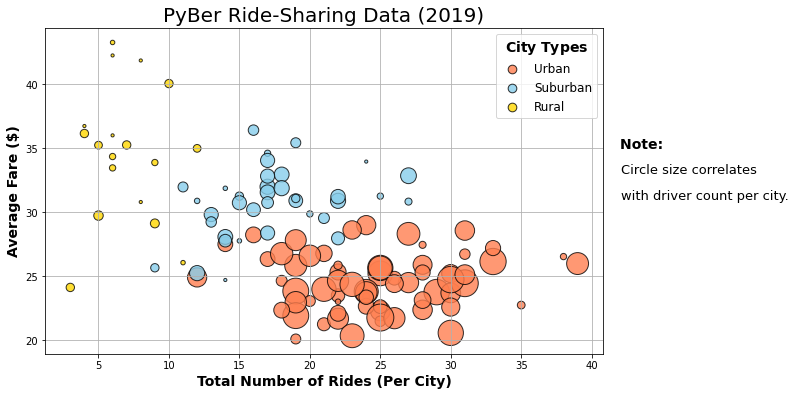

In [15]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))

# Build the scatter plot for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10,
            ec = "k", linewidths=1,
            c='coral', label="Urban", alpha=0.8)

# Build the scatter plot for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare, s= suburban_driver_count*10, ec='k',
           c='skyblue', label="Suburban", linewidths=1, alpha=0.8)

# Build the scatter plot for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s= rural_driver_count*10, ec='k',
           c='gold', label="Rural", linewidths=1, alpha = 0.8)

# Incorporate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=14, fontweight= "bold")
plt.ylabel("Average Fare ($)", fontsize=14, fontweight= "bold")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize= 12, mode = "Expanded", scatterpoints=1, 
                  loc="best", title=r"$\bf{City}$ $\bf{Types}$")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(14)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: ", fontsize="14", fontweight="bold")
plt.text(42.1,33, "Circle size correlates", fontsize="13")
plt.text(42.1,31, "with driver count per city.", fontsize="13")

# Save the fig.
plt.savefig("Analysis/Fig1.png", bbox_inches='tight', facecolor='white')

# Display bubble chart
plt.show()

In [16]:
# Get summary statistics df
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [17]:
# Get summary statistics ride count
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [18]:
#Calculate the mean of the ride count for each city.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [19]:
# Calculate the median of the ride count for each city.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [20]:
# Calculate the mode of the ride count
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [21]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}")
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.00
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))


In [22]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}")
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}")
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}")

The mean for the ride counts for suburban trips is 17.36
The median for the ride counts for suburban trips is 17.0
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7]))


In [23]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean((rural_ride_count))
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}")
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}")
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}")

The mean for the ride counts for rural trips is 6.94
The median for the ride counts for rural trips is 6.00
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5]))


In [24]:
# Calculate the measures of central tendency for the average fare for urban cities.
urban_fares = urban_cities_df["fare"]
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)
print(f"The mean for the average fare for urban cities is {mean_urban_fares:.2f}")
print(f"The median for the average fare for urban cities is {median_urban_fares}")
print(f"The mode for the average fare for urban cities is {mode_urban_fares}")

The mean for the average fare for urban cities is 24.53
The median for the average fare for urban cities is 24.64
The mode for the average fare for urban cities is ModeResult(mode=array([22.86]), count=array([5]))


In [25]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mean for the average fare for suburban cities is {mean_suburban_fares:.2f}")
print(f"The median for the average fare for suburban cities is {median_suburban_fares}")
print(f"The mode for the average fare for suburban cities is {mode_suburban_fares}")

The mean for the average fare for suburban cities is 30.97
The median for the average fare for suburban cities is 30.75
The mode for the average fare for suburban cities is ModeResult(mode=array([17.99]), count=array([3]))


In [26]:
# Calculate the measures of central tendency for the average fare for rural cities.
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)
print(f"The mean for the average fare for rural cities is {mean_rural_fares:.2f}")
print(f"The median for the average fare for rural cities is {median_rural_fares}")
print(f"The mode for the average fare for rural cities is {mode_rural_fares}")

The mean for the average fare for rural cities is 34.62
The median for the average fare for rural cities is 37.05
The mode for the average fare for rural cities is ModeResult(mode=array([37.05]), count=array([2]))


In [63]:
# Calculate the measures of central tendency for the driver count for the urban cities.
urban_drivers = urban_cities_df["driver_count"]
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mean for the driver count for urban cities is {mean_urban_drivers:.2f}")
print(f"The median for the driver count for urban cities is {median_urban_drivers}")
print(f"The mode for the driver count for urban cities is {mode_urban_drivers}")

The mean for the driver count for urban cities is 36.68
The median for the driver count for urban cities is 37.0
The mode for the driver count for urban cities is ModeResult(mode=array([39]), count=array([86]))


In [64]:
# Calculate the measures of central tendency for the driver count for the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mean for the driver count for suburban cities is {mean_suburban_drivers:.0f}")
print(f"The median for the driver count for suburban cities is {median_suburban_drivers}")
print(f"The mode for the driver count for suburban cities is {mode_suburban_drivers}")

The mean for the driver count for suburban cities is 14
The median for the driver count for suburban cities is 16.0
The mode for the driver count for suburban cities is ModeResult(mode=array([20]), count=array([79]))


In [65]:
# Calculate the measures of central tendency for the driver count for the rural cities.
# Calculate the measures of central tendency for the driver count for the suburban cities.
rural_drivers = rural_cities_df["driver_count"]
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mean for the driver count for rural cities is {mean_rural_drivers:.2f}")
print(f"The median for the driver count for rural cities is {median_rural_drivers}")
print(f"The mode for the driver count for rural cities is {mode_rural_drivers}")

The mean for the driver count for rural cities is 4.30
The median for the driver count for rural cities is 4.0
The mode for the driver count for rural cities is ModeResult(mode=array([1]), count=array([32]))


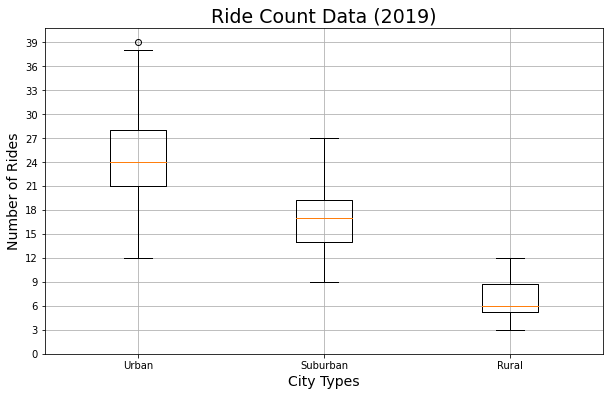

In [66]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels= ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10,6))
ride_count_data = (urban_ride_count, suburban_ride_count, rural_ride_count)
ax.boxplot(ride_count_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=19)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize= 14)
ax.set_yticks(np.arange(0,41, step= 3))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig2.png", bbox_inches = 'tight', facecolor = 'white')


# Display box-and-whisker plot
plt.show()

In [67]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

West Angela has the highest rider count


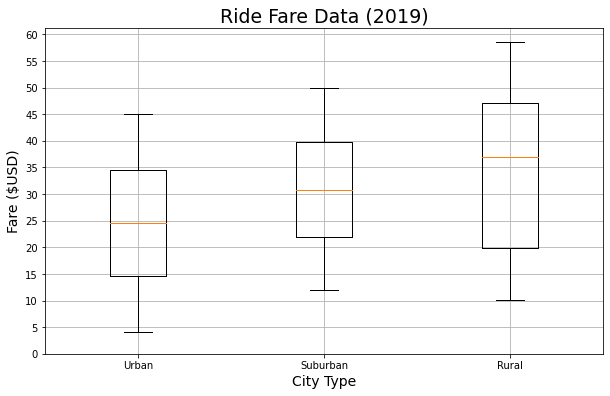

Summary statistic 
Urban Fare: count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
 Suburban Fare: count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
 Rural Fare: count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [85]:
# Create a box-and-whisker plot for the fare data.
x_labels= ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10,6))
urban_fare_data = (urban_fares, suburban_fares, rural_fares)
ax.boxplot(urban_fare_data, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)", fontsize=19)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.set_yticks(np.arange(0,61, step=5))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig3.png", bbox_inches='tight', facecolor='white')

# Display box-and-whisker plot
plt.show()


print(f"Summary statistic \nUrban Fare: {urban_fares.describe()}"
      f"\n Suburban Fare: {suburban_fares.describe()}"
      f"\n Rural Fare: {rural_fares.describe()}")

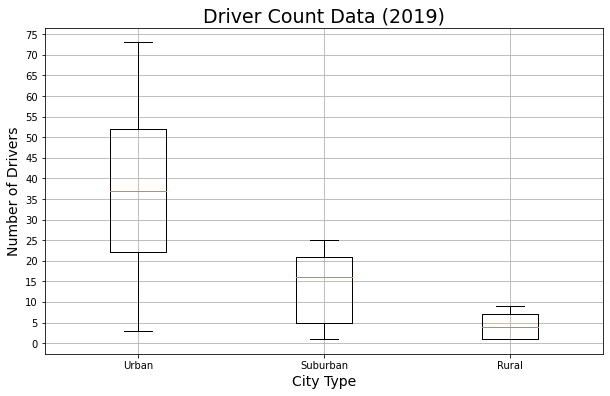

Summary statistic 
Urban Drivers: count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64
Suburban Drivers: count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64
Rural Drivers: count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


In [87]:
# Create a box-and-whisker plot for the driver count data
x_labels=["Urban", "Suburban", "Rural"]
fig,ax = plt.subplots(figsize=(10,6))
drivers_count_data = (urban_drivers, suburban_drivers, rural_drivers)
ax.boxplot(drivers_count_data, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Driver Count Data (2019)", fontsize=19)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.set_yticks(np.arange(0,76,step=5))
ax.grid()

# Save figure
plt.savefig("Analysis/Fig4.png", bbox_inches='tight', facecolor="white")

# Display box-and-whisker plot
plt.show()

print(f"Summary statistic \nUrban Drivers: {urban_drivers.describe()}"
      f"\nSuburban Drivers: {suburban_drivers.describe()}"
      f"\nRural Drivers: {rural_drivers.describe()}")

In [92]:
# Get the sum of the fares for each city type.
sum_fares_by_data_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_data_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [93]:
# Get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [94]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

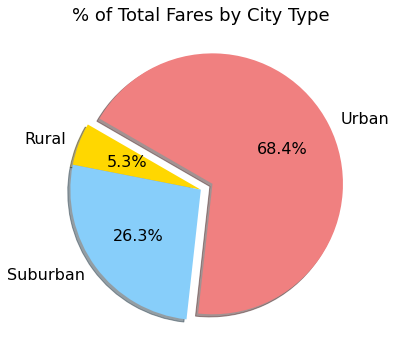

In [126]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels = ["Rural","Suburban", "Urban"],
        colors = ["gold", "lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',        
        shadow = True, startangle=150)
plt.title("% of Total Fares by City Type", fontsize=18)

# Change the defautl font size from 0 to 16.
mpl.rcParams['font.size'] = 16

# Save figure
plt.savefig("Analysis/Fig5.png", facecolor='white')
# Show figure
plt.show()

In [127]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].sum()
ride_percents

type
Rural       1.076912e-12
Suburban    5.384559e-12
Urban       1.399985e-11
Name: ride_id, dtype: float64

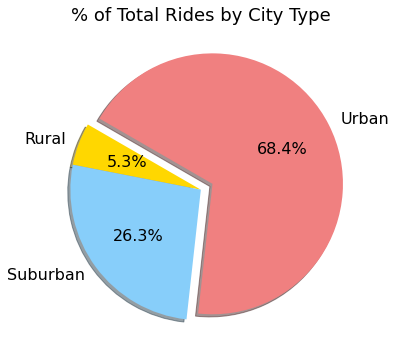

In [129]:
# Build the percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow = True, startangle=150)
plt.title("% of Total Rides by City Type", fontsize=18)

# Change the default font size from 0 to 16.
mpl.rcParams['font.size'] = 16

# Save figure
plt.savefig("Analysis/Fig6.png", facecolor = 'white')

# Show figure
plt.show()